# Data Collection

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [ ]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [ ]:
for i in range(1, 38):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content)

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 31
Error on page 32
Error on page 32
Error on page 35
Error on page 35


In [ ]:
print(len(reviews))
print(len(stars))
print(len(date))
print(len(country))

3625
3662
3625
3625


In [ ]:
stars = stars[:len(reviews)]
print(len(stars))

3625


In [ ]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})
df

,reviews,stars,date,country
0,✅ Trip Verified | My family flew from Washing...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,19th August 2023,United States
1,✅ Trip Verified | Easy check in a T5. Galleri...,7,13th August 2023,United Kingdom
2,"Not Verified | Flight delayed by an hour, it ...",8,12th August 2023,United States
3,Not Verified | The staff are very rude and not...,2,11th August 2023,United Kingdom
4,✅ Trip Verified | Good domestic flight operat...,2,8th August 2023,United Kingdom
...,...,...,...,...
3620,This was a bmi Regional operated flight on a R...,9,29th August 2012,United Kingdom
3621,LHR to HAM. Purser addresses all club passenge...,7,28th August 2012,United Kingdom
3622,My son who had worked for British Airways urge...,1,12th October 2011,United Kingdom
3623,London City-New York JFK via Shannon on A318 b...,9,11th October 2011,United States


In [ ]:
df.to_csv("BA_reviews.csv",index=False)

# Data Cleaning

In [ ]:
df=pd.read_csv("BA_reviews.csv")
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | My family flew from Washing...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,19th August 2023,United States
1,✅ Trip Verified | Easy check in a T5. Galleri...,7,13th August 2023,United Kingdom
2,"Not Verified | Flight delayed by an hour, it ...",8,12th August 2023,United States
3,Not Verified | The staff are very rude and not...,2,11th August 2023,United Kingdom
4,✅ Trip Verified | Good domestic flight operat...,2,8th August 2023,United Kingdom


In [ ]:
#for lemmatization of words we will use nltk library
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
text =[]

#loop through each review, remove punctuations, small case it, join it and add it to text
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    text.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['cleaned_review']=text
df.head()

,reviews,stars,date,country,cleaned_review
0,✅ Trip Verified | My family flew from Washing...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,19th August 2023,United States,family flew washington london british airway a...
1,✅ Trip Verified | Easy check in a T5. Galleri...,7,13th August 2023,United Kingdom,easy check gallery south north lounge packed a...
2,"Not Verified | Flight delayed by an hour, it ...",8,12th August 2023,United States,verified flight delayed hour happens biggie u ...
3,Not Verified | The staff are very rude and not...,2,11th August 2023,United Kingdom,verified staff rude trained properly exception...
4,✅ Trip Verified | Good domestic flight operat...,2,8th August 2023,United Kingdom,good domestic flight operated ba cityflyer gro...


In [ ]:
df.dtypes

reviews           object
stars             object
date              object
country           object
cleaned_review    object
dtype: object

In [ ]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2023-08-19
1   2023-08-13
2   2023-08-12
3   2023-08-11
4   2023-08-08
Name: date, dtype: datetime64[ns]

In [ ]:
df.stars.value_counts()

1                                824
2                                414
3                                398
8                                357
10                               321
7                                308
9                                305
4                                243
5                                228
6                                186
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     36
None                               5
Name: stars, dtype: int64

In [ ]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
df.stars.value_counts()

1     824
2     414
3     398
8     357
10    321
7     308
9     305
5     264
4     243
6     186
Name: stars, dtype: int64

In [ ]:
df.stars=pd.to_numeric(df.stars)
df.dtypes

reviews                   object
stars                      int64
date              datetime64[ns]
country                   object
cleaned_review            object
dtype: object

In [ ]:
df.isnull().sum()

reviews           0
stars             0
date              0
country           2
cleaned_review    0
dtype: int64

In [ ]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df

,reviews,stars,date,country,cleaned_review
0,✅ Trip Verified | My family flew from Washing...,5,2023-08-19,United States,family flew washington london british airway a...
1,✅ Trip Verified | Easy check in a T5. Galleri...,7,2023-08-13,United Kingdom,easy check gallery south north lounge packed a...
2,"Not Verified | Flight delayed by an hour, it ...",8,2023-08-12,United States,verified flight delayed hour happens biggie u ...
3,Not Verified | The staff are very rude and not...,2,2023-08-11,United Kingdom,verified staff rude trained properly exception...
4,✅ Trip Verified | Good domestic flight operat...,2,2023-08-08,United Kingdom,good domestic flight operated ba cityflyer gro...
...,...,...,...,...,...
3620,This was a bmi Regional operated flight on a R...,9,2012-08-29,United Kingdom,bmi regional operated flight rj manchester hea...
3621,LHR to HAM. Purser addresses all club passenge...,7,2012-08-28,United Kingdom,lhr ham purser address club passenger name boa...
3622,My son who had worked for British Airways urge...,1,2011-10-12,United Kingdom,son worked british airway urged fly british ai...
3623,London City-New York JFK via Shannon on A318 b...,9,2011-10-11,United States,london city new york jfk via shannon really ni...


In [ ]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,cleaned_review
0,✅ Trip Verified | My family flew from Washing...,5,2023-08-19,United States,family flew washington london british airway a...
1,✅ Trip Verified | Easy check in a T5. Galleri...,7,2023-08-13,United Kingdom,easy check gallery south north lounge packed a...
2,"Not Verified | Flight delayed by an hour, it ...",8,2023-08-12,United States,verified flight delayed hour happens biggie u ...
3,Not Verified | The staff are very rude and not...,2,2023-08-11,United Kingdom,verified staff rude trained properly exception...
4,✅ Trip Verified | Good domestic flight operat...,2,2023-08-08,United Kingdom,good domestic flight operated ba cityflyer gro...
...,...,...,...,...,...
3613,This was a bmi Regional operated flight on a R...,9,2012-08-29,United Kingdom,bmi regional operated flight rj manchester hea...
3614,LHR to HAM. Purser addresses all club passenge...,7,2012-08-28,United Kingdom,lhr ham purser address club passenger name boa...
3615,My son who had worked for British Airways urge...,1,2011-10-12,United Kingdom,son worked british airway urged fly british ai...
3616,London City-New York JFK via Shannon on A318 b...,9,2011-10-11,United States,london city new york jfk via shannon really ni...


In [ ]:
df.to_csv('Cleaned-BA-reviews.csv',index=False)

## Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Counts for each ratings')

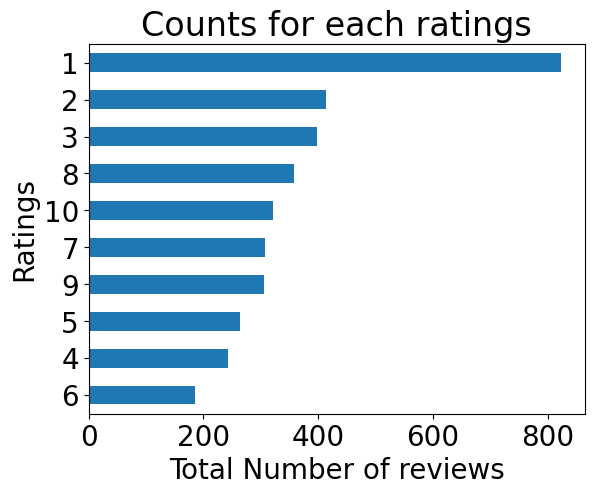

In [ ]:
plt.rcParams.update({'font.size': 20})
df.stars.value_counts(ascending=True).plot(kind="barh")
plt.ylabel("Ratings")
plt.xlabel("Total Number of reviews")
plt.title("Counts for each ratings")

In [ ]:
round(df.stars.mean(),2)

4.76

In [ ]:
len(df.country.unique())

71

Text(0.5, 1.0, 'Review by country')

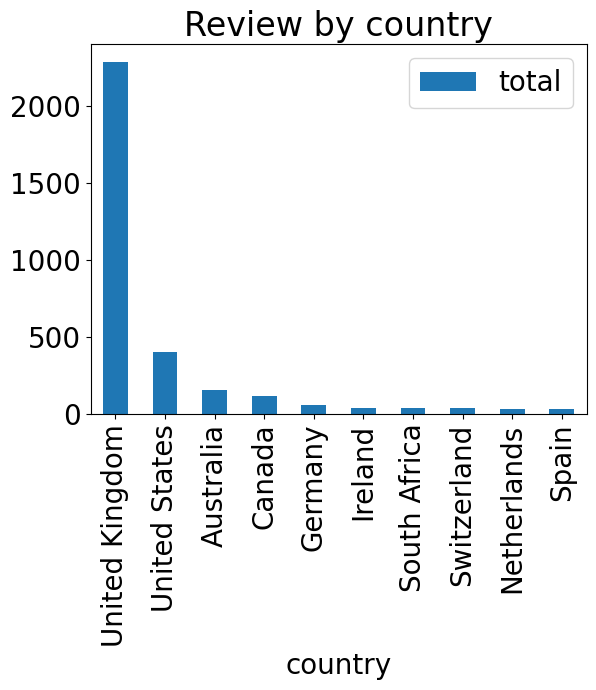

In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head(10)).reset_index()
df_country_review.rename(columns={'index':'country','country':'total'}, inplace=True)
df_country_review.plot(kind="bar", x='country')
plt.title("Review by country")

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Sentiment Analysis using VADER

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['cleaned_review'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,stars,date,country,cleaned_review,Sentiment,Analysis
0,✅ Trip Verified | My family flew from Washing...,5,2023-08-19,United States,family flew washington london british airway a...,0.9777,Positive
1,✅ Trip Verified | Easy check in a T5. Galleri...,7,2023-08-13,United Kingdom,easy check gallery south north lounge packed a...,0.9415,Positive
2,"Not Verified | Flight delayed by an hour, it ...",8,2023-08-12,United States,verified flight delayed hour happens biggie u ...,-0.1250,Negative
3,Not Verified | The staff are very rude and not...,2,2023-08-11,United Kingdom,verified staff rude trained properly exception...,-0.4588,Negative
4,✅ Trip Verified | Good domestic flight operat...,2,2023-08-08,United Kingdom,good domestic flight operated ba cityflyer gro...,0.9420,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2081
Negative    1162
Neutral      375
Name: Analysis, dtype: int64

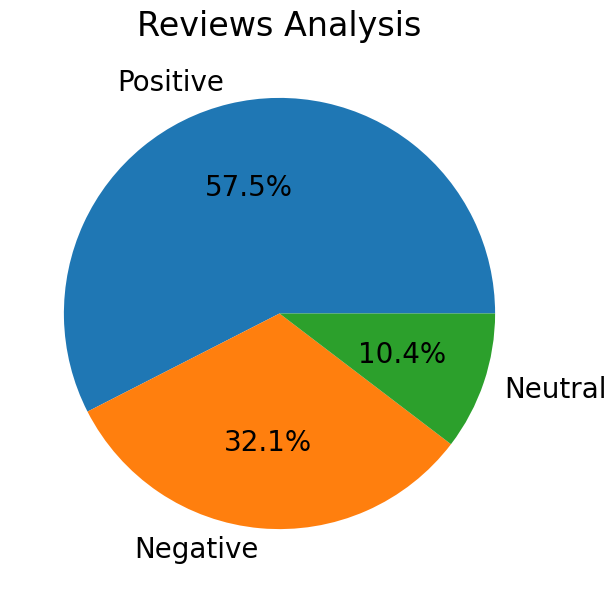

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index,autopct='%1.1f%%')
plt.show()

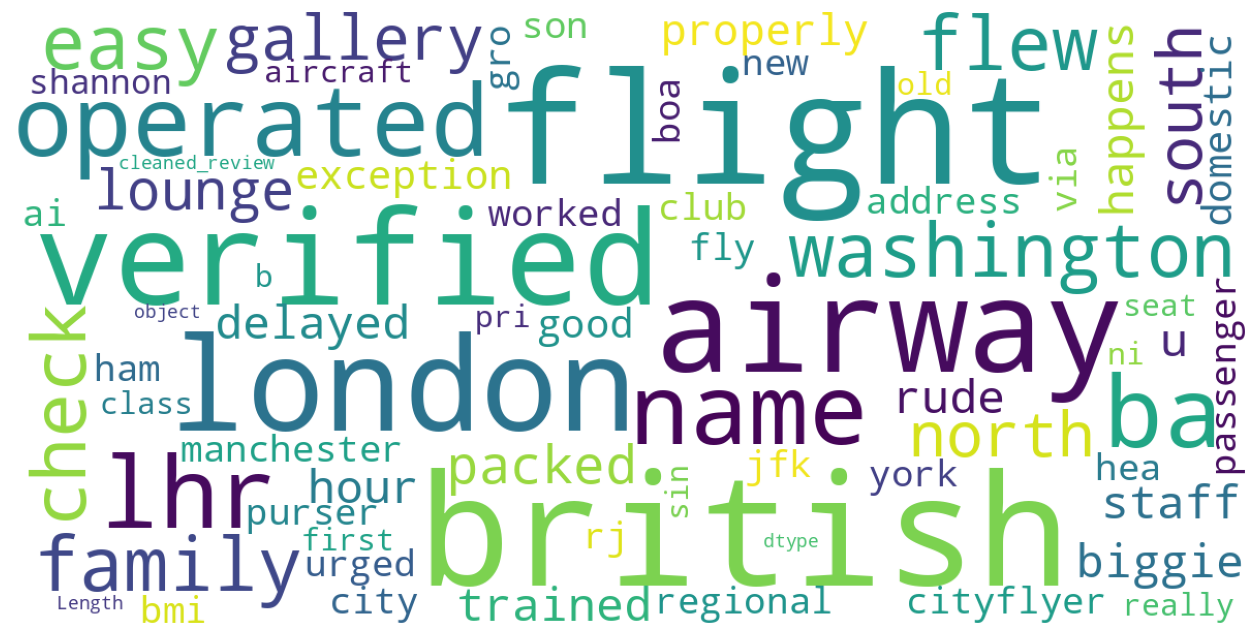

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.cleaned_review)

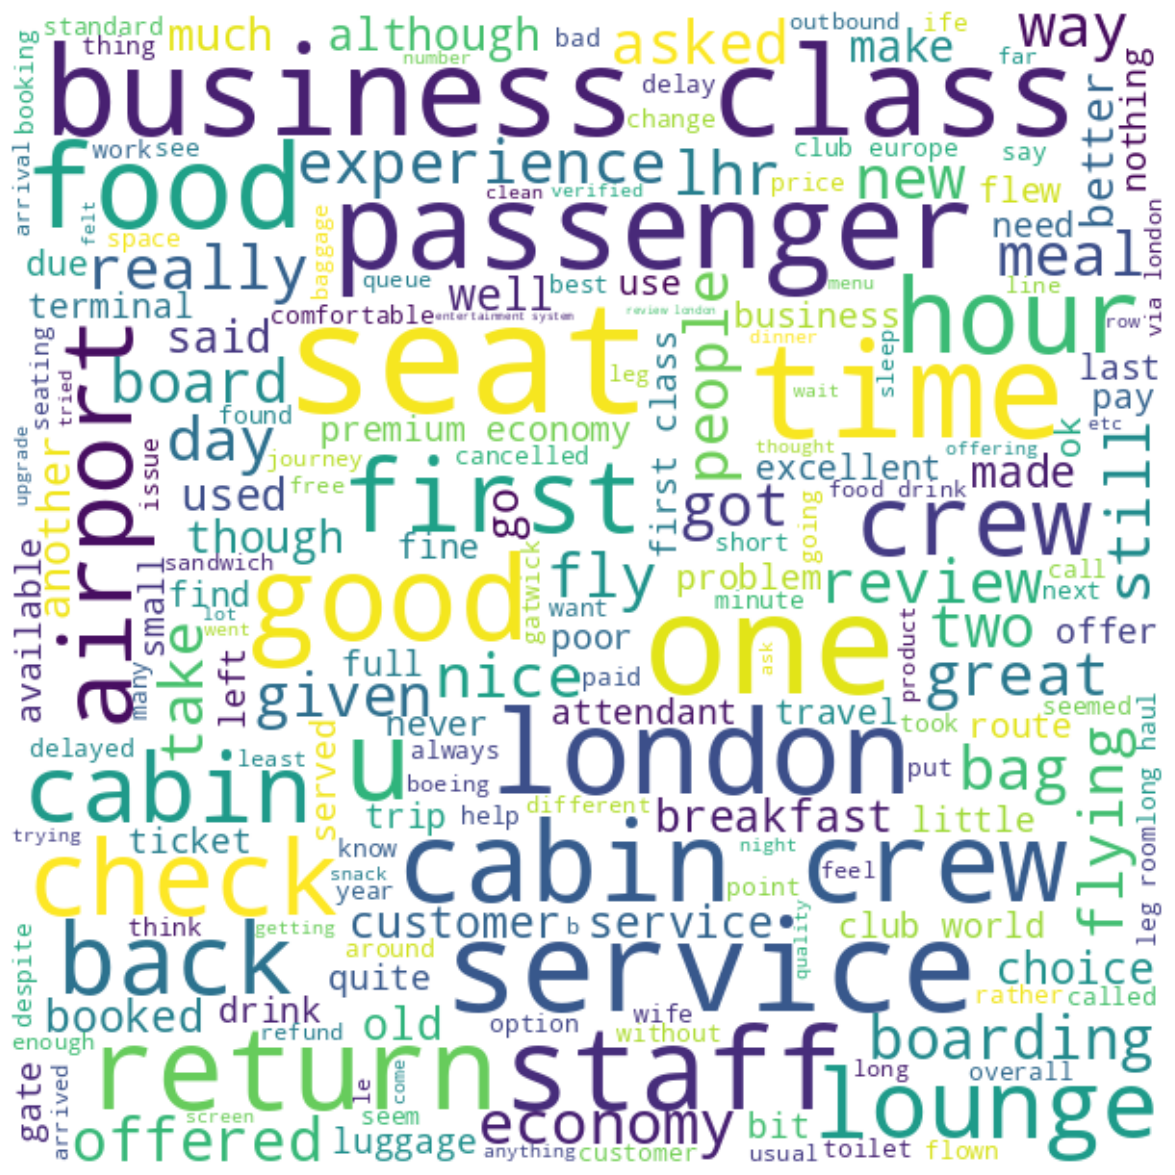

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,15))
stopwords = set(STOPWORDS)
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
wordcloud = WordCloud(height=600,width=600,background_color='white',max_font_size=80, max_words=200, stopwords=stopwords).generate(" ".join(df.cleaned_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

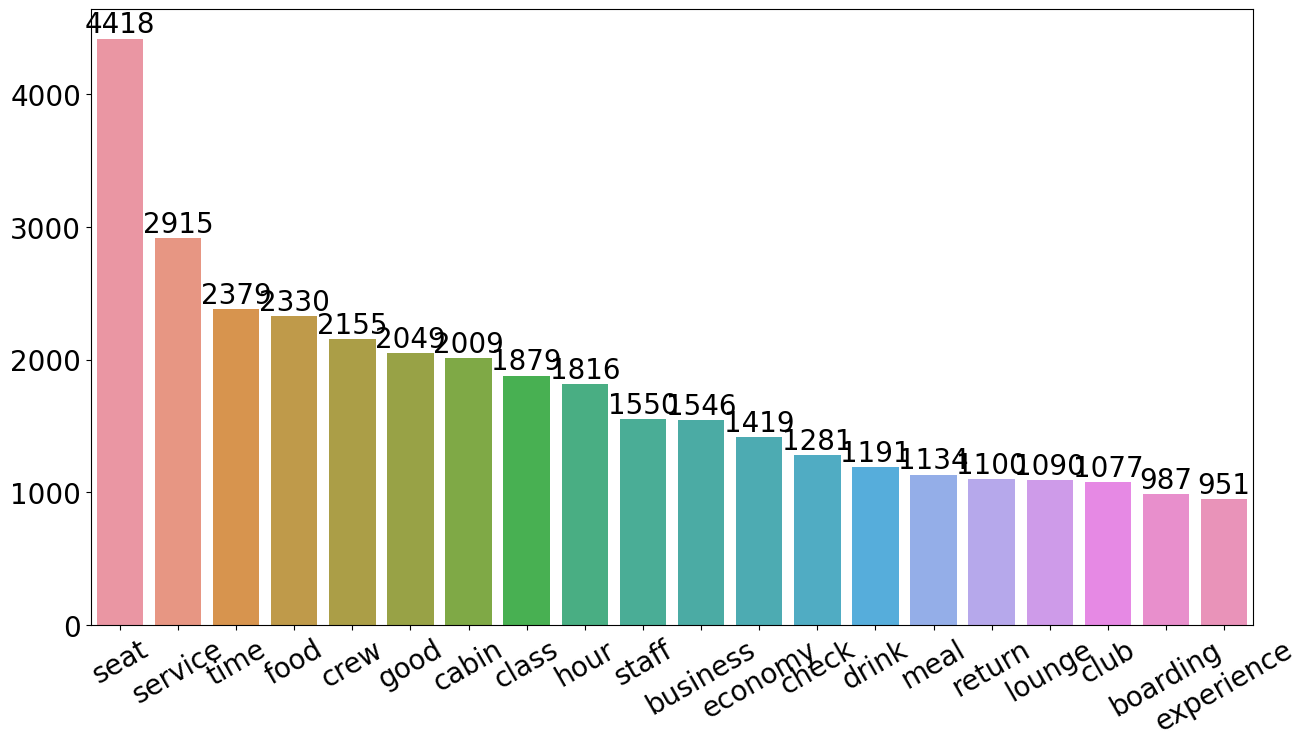

In [ ]:
#word frequency
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
reviews = " ".join(df.cleaned_review)
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.show()